# Fall 2023 - Final Project - GF180 MPW Shuttle Submission

## Caravel GF180 MPW User Environment

<b>Lecture Date:</b> 12/4/2023

<b>Final Project Due (to Get on the Shuttle):</b> <font color="red"><b>12/11/23 at 6:00pm</b></font><br>
<b>Final Project Due (for course credit):</b> <font color="red"><b>12/14/23 at 6:00pm</b></font><br>

## Overview

You will develop a Verilog circuit to synthesize on the EFabless Caravel OpenLane flow using the Global Foundries gf180mcuD Process Development Kit.

For example, I implemented the full 8-bit RISC Processor in Verilog, and my solution is open and available at the following links:
<ol>
    <li><b>EFabless</b> - <a href = "https://repositories.efabless.com/mattmorrison/nd-mips8-efabless">https://repositories.efabless.com/mattmorrison/nd-mips8-efabless</a></li>
    <ul><li>Note: You will need to create an account to view on EFabless. You will do this in this Final Project<p></li></ul>
    <li><b>GitHub</b> - <a href = "https://github.com/mmorri22/nd-mips8-efabless">https://github.com/mmorri22/nd-mips8-efabless</a></li>
</ol>

### Part 1 - Getting Started

> <b>Note 1</b>: This example assumes completion of the <a href = "https://github.com/mmorri22/cse30342/blob/main/Resources/Final%20Project.ipynb">EFabless Setup</a>.

> <b>Note 2</b>: Several of the steps do not work if you are connected to a Virtual Private Network. You will not need a VPN to complete this assignment.

<b>1) Open your VS Code or Terminal</b>

Enter into yourLinux Distro.

If you are on Windows, type <code>wsl</code>

  
<b>2) Set up Environment Variables</b>

Recall the <code>exports.sh</code> file that you created. You will <code>source</code> that file, just like we've been doing with Cadence all semester

    source exports.sh
    
To verify, perform the following commands:

    > echo $OPENLANE_ROOT
    /mnt/c/Users/mmorri22/asic/openlane
     
    > echo $PDK_ROOT
    /mnt/c/Users/mmorri22/asic/pdk
    
    > ls $OPENLANE_ROOT
    AUTHORS.md       Jenkinsfile  Makefile   configuration  designs  docs    flow.tcl  klayoutrc           requirements.txt      requirements_lint.txt  scripts
    CONTRIBUTING.md  LICENSE      README.md  dependencies   docker   env.py  gui.py    regression_results  requirements_dev.txt  run_designs.py         tests
      
    > ls $PDK_ROOT
    gf180mcuA  gf180mcuB  gf180mcuC  gf180mcuD  volare


<b>3) Go into your Caravel User Project</b>

    cd caravel_user_project/


<b>4) Running KLayout and Changing Editing Permissions</b>

Check the gds file:

    ls gds/
    
This is what you should be able to view:

    user_proj_example.gds  user_project_wrapper.gds

To verify it works, perform the following command:

    klayout -l ../asic/pdk/gf180mcuC/libs.tech/klayout/tech/gf180mcu.lyp gds/user_proj_example.gds & 
    
We will enable the ability to edit the circuit by performing the following tasks in KLayout.
<ol>
    <li>Go to <b>File -> Setup</b></li>
    <li>Under <b>Application</b>, select <b>Editing Mode</b></li>
    <li>Select <b>Use Editing Mode By Default</b></li>
    <li>Select <b>Apply</b> and then <b>OK</b></li>
</ol>

<b>5) Changing the Layers View</b>

At first glance, this appears like a giant yellow box. This is because the Caravel "Harness" is designed to take on larger projects than the sample synthesis flow provided. As a result, most of the chip is empty. 

If you look carefully at the bottom, you'll see that the circuit appears to have more wiring and cells in use.

But how can we view this more clearly? Let's play around with layers.

Select <b>View -> Layers</b>

You will see the layers that correspond to all the different layers we have learned about this semester.

On the left, select the arrow next to <b>user_proj_example</b>. This includes all the cells in the gf180mcuC PDK.

To help us view the layout, we will de-select all the "fill" cells. Scroll down the the first one "<code>fill_1</code>" and start doubling clicking until all the fills are crossed out. The circuit will now be much more visible. An example "Before and After" is shown below:

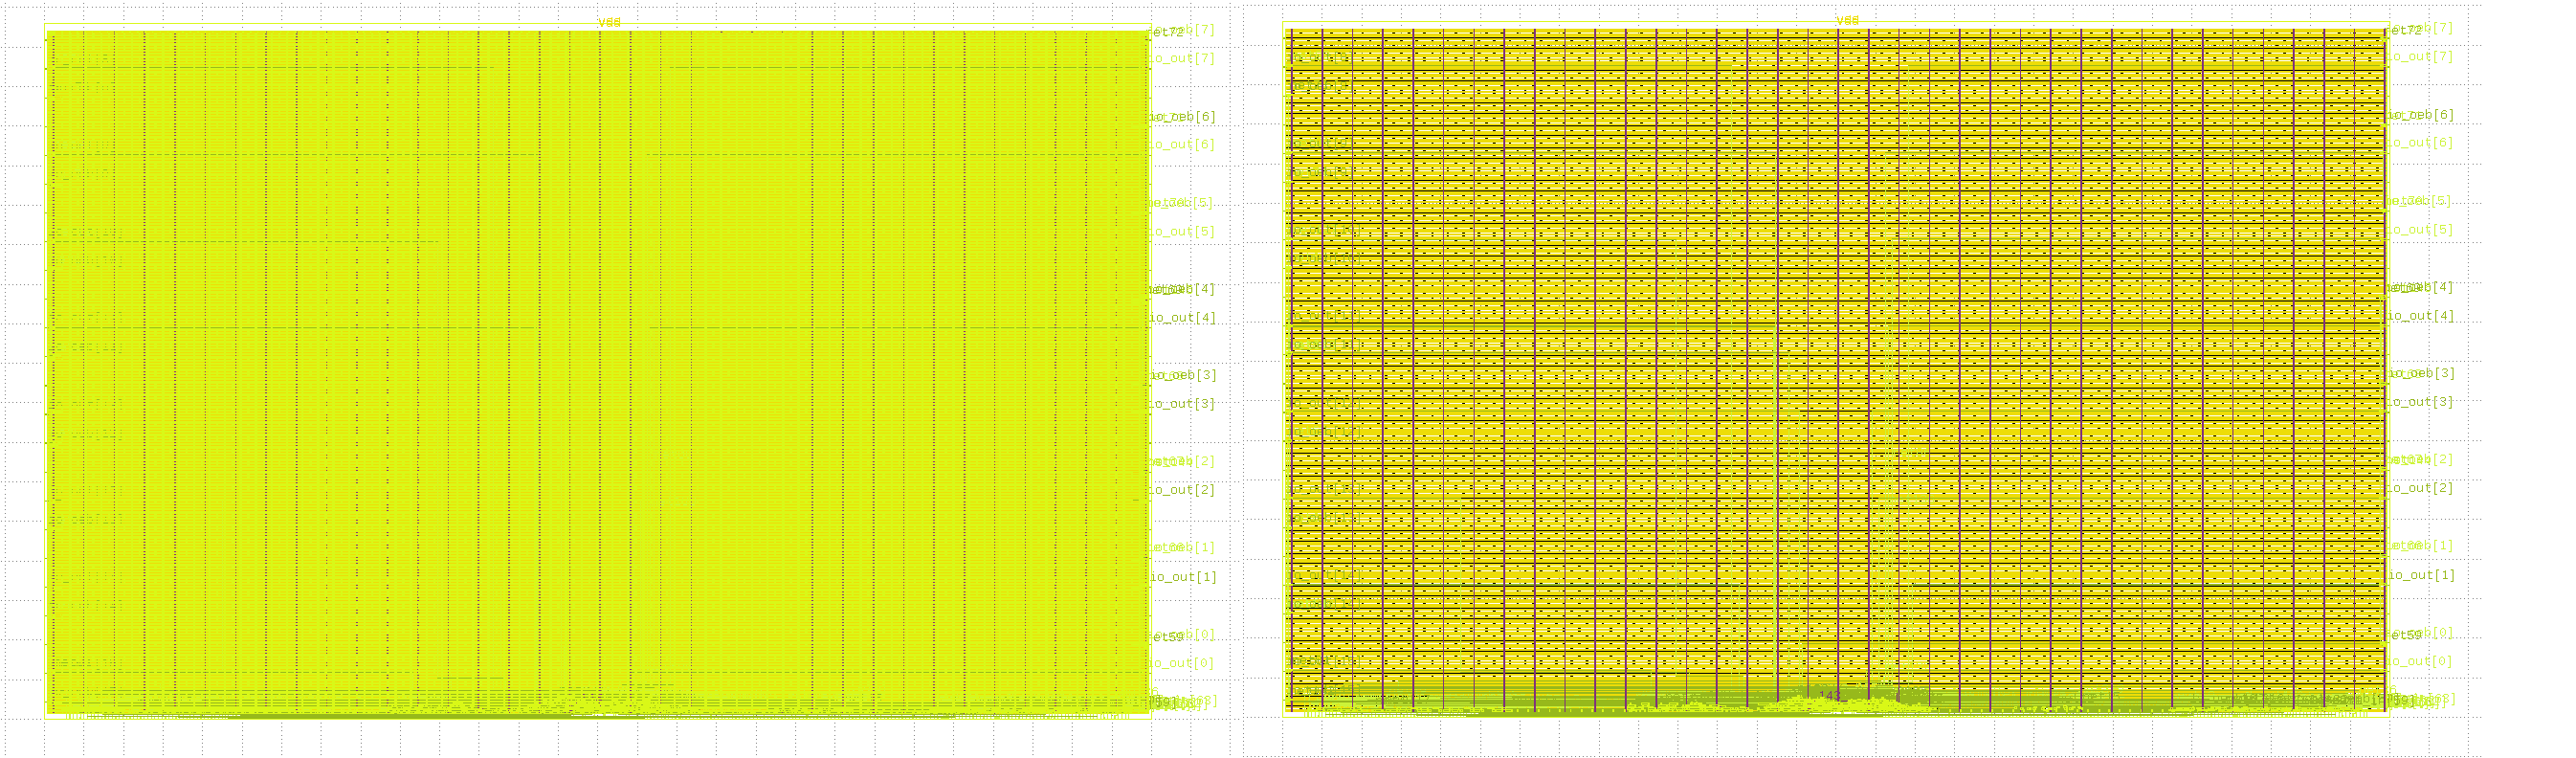


### Working through an Example

Go into the Verilog directory

    > cd verilog
    > ls

You will see the following folders:

    dv  gl  includes  rtl
    
The Verilog we will write will be in the rtl folder. Go into that folder

    > cd rtl
    > ls
    
You will see the Verilog for the <code>usr_proj_example</code> that you synthesized in the setup.

    defines.v  uprj_netlists.v  user_defines.v  user_proj_example.v  user_project_wrapper.v
    
We will now develop our own example.

    mkdir risc
    cd risc
    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec39/risc.v
    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec38/counter.v
    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec39/controller.v
    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec39/multiplexor.v
    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec39/memory.v
    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec39/register.v
    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec39/alu.v
    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec39/driver.v
    cd ..
    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec39/risc_project_wrapper.v

We now have the Verilog files we've developed and tested in the last two lectures.

#### Linking the Verilog Files

We need to let the RTL Compiler know where all our Verilog files are located.

    cd ../includes
    ls
    
If you are in the correct folder, you will see the following:

    includes.gl+sdf.caravel_user_project  includes.gl.caravel_user_project  includes.rtl.caravel_user_project
    
Open the <code>includes.rtl.caravel_user_project</code> and modify it to perform the following:
    
    
#### Modifying the User Project Files

Modify the <code>includes.gl.caravel_user_project</code> file. We will change the second to <code>risc_example.v</code>

    # Caravel user project includes
    -v $(USER_PROJECT_VERILOG)/rtl/user_project_wrapper.v	     
    -v $(USER_PROJECT_VERILOG)/rtl/risc_example.v

    # Caravel user project includes
    -v $(USER_PROJECT_VERILOG)/rtl/risc/alu.v
    -v $(USER_PROJECT_VERILOG)/rtl/risc/controller.v
    -v $(USER_PROJECT_VERILOG)/rtl/risc/counter.v
    -v $(USER_PROJECT_VERILOG)/rtl/risc/driver.v
    -v $(USER_PROJECT_VERILOG)/rtl/risc/memory.v
    -v $(USER_PROJECT_VERILOG)/rtl/risc/multiplexor.v
    -v $(USER_PROJECT_VERILOG)/rtl/risc/register.v
    -v $(USER_PROJECT_VERILOG)/rtl/risc/risc.v
    -v $(USER_PROJECT_VERILOG)/rtl/risc_project_wrapper.v

## Updating <code>usr_project_wrapper</code> to account for our project



## Modifying the


From the <code>caravel_user_project/verilog/rtl</code> folder:

    cd ../../openlane/user_proj_example
    

## Controller

Let's study a Verilog description of a MIPS 8-bit Multicycle CPU 

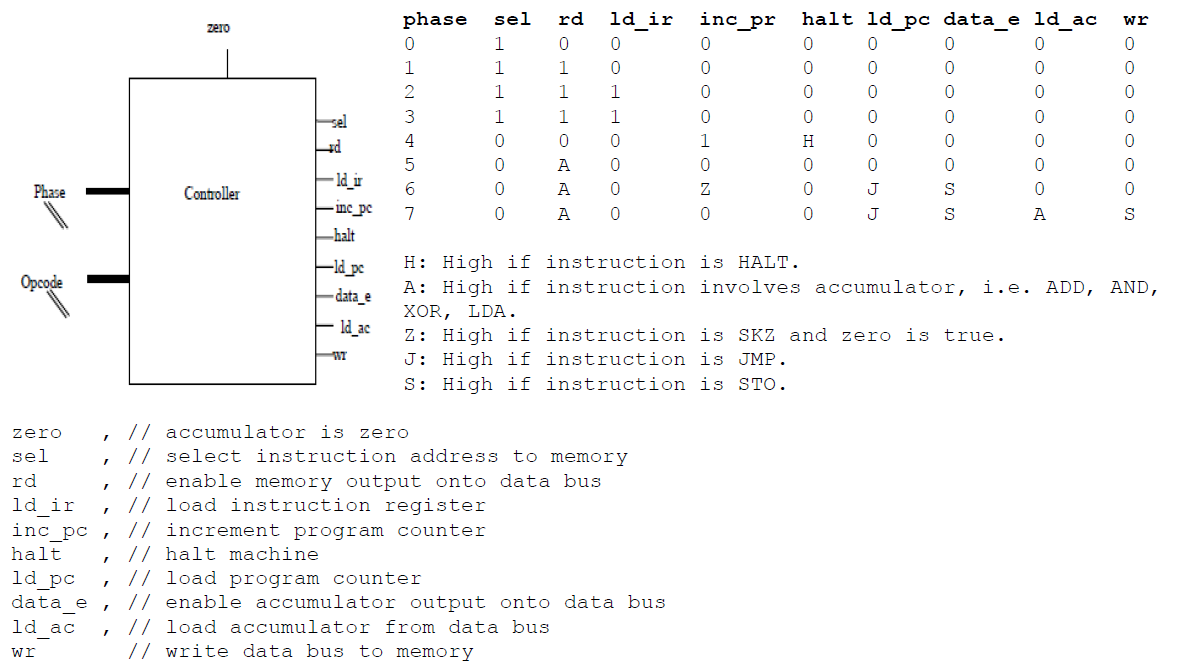

We will use a <code>reg</code> to save an intermediate output, similar to using a Flip-Flip to store intermediate stages.

    module controller
    (
      input  wire [2:0] opcode ,
      input  wire [2:0] phase  ,
      input  wire       zero   , // accumulator is zero
      output reg        sel    , // select instruction address to memory
      output reg        rd     , // enable memory output onto data bus
      output reg        ld_ir  , // load instruction register
      output reg        inc_pc , // increment program counter
      output reg        halt   , // halt machine
      output reg        ld_pc  , // load program counter
      output reg        data_e , // enable accumulator output onto data bus
      output reg        ld_ac  , // load accumulator from data bus
      output reg        wr       // write data bus to memory
    );

      localparam integer HLT=0, SKZ=1, ADD=2, AND=3, XOR=4, LDA=5, STO=6, JMP=7;

      reg H,A,Z,J,S;

      always @* begin
          H = (opcode == HLT);
          A = (opcode == ADD || opcode == AND || opcode == XOR || opcode == LDA);
          Z = (opcode == SKZ && zero);
          J = (opcode == JMP);
          S = (opcode == STO);
          case ( phase )
      0:begin sel=1;rd=0;ld_ir=0;inc_pc=0;halt=0;ld_pc=0;data_e=0;ld_ac=0;wr=0;end
      1:begin sel=1;rd=1;ld_ir=0;inc_pc=0;halt=0;ld_pc=0;data_e=0;ld_ac=0;wr=0;end
      2:begin sel=1;rd=1;ld_ir=1;inc_pc=0;halt=0;ld_pc=0;data_e=0;ld_ac=0;wr=0;end
      3:begin sel=1;rd=1;ld_ir=1;inc_pc=0;halt=0;ld_pc=0;data_e=0;ld_ac=0;wr=0;end
      4:begin sel=0;rd=0;ld_ir=0;inc_pc=1;halt=H;ld_pc=0;data_e=0;ld_ac=0;wr=0;end
      5:begin sel=0;rd=A;ld_ir=0;inc_pc=0;halt=0;ld_pc=0;data_e=0;ld_ac=0;wr=0;end
      6:begin sel=0;rd=A;ld_ir=0;inc_pc=Z;halt=0;ld_pc=J;data_e=S;ld_ac=0;wr=0;end
      7:begin sel=0;rd=A;ld_ir=0;inc_pc=0;halt=0;ld_pc=J;data_e=S;ld_ac=A;wr=S;end
          endcase
        end
    endmodule
    
To run and test:

    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec39/controller.v
    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec39/controller_test.v
    
    irun controller.v controller_test.v

## Blocking Assignments in Sequential Procedures

A challenge: Blocking assignments can lead to race conditions, specifically when the same event triggers multiple procedures.

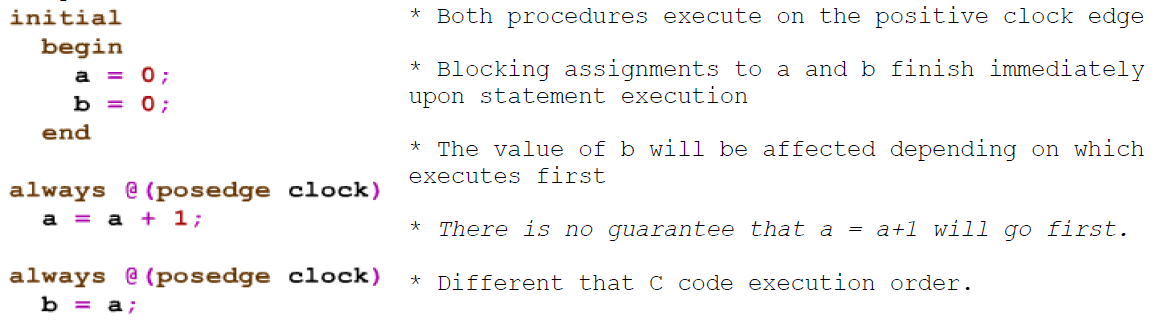

### The Blocking Assignment Order Affects Functionality

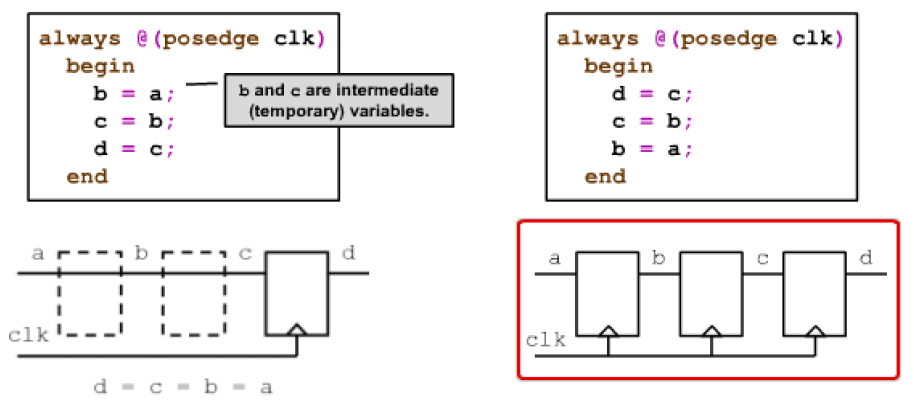

### Non-Blocking Statements

A nonblocking assignment schedules completion and does not block
• By default, completes when all executing blocks have been blocked

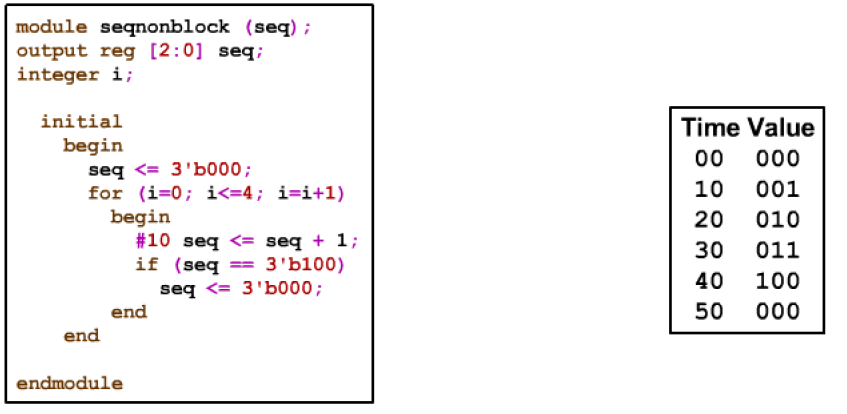

### We've already seen this!

Recall from our <a href = "https://raw.githubusercontent.com/mmorri22/cse30342/main/lec37/nand2_stim.v">nand2_stim.v</a> that we designed together:

    module nand2_Stim(A, B); 

        output A, B;

        parameter delay = 100; // Delay

        // Used for creating two-input binary test 
        reg [1:0] cnt;

        initial begin
            cnt = 0;
            // repeat (3) means do the function 4 times
            // Similar: for(i=0; i < 4; i++) 
            repeat (3) begin
                #delay cnt=cnt+1; /*** NON-BLOCKING STATEMENT *****/
            end
        end

        // Automaticaly convert 'cnt' this to binary
        // 0 -> A = '0', B = '0'
        // 1 -> A = '0', B = '1'... and so on. 
        assign {A,B} = cnt;

    endmodule
    
### Can Nonblocking Assignment Order Affect Functionality

Nonblocking Assignment order of appearance cannot affect functionality if:
<ul>
    <li>Statements are executed in the same simulation cycle</li>
    <li>Each target is assigned only once</li>
    <li>No target is assigned in any other procedural block</li>
    <li>No blocking assignments are mixed with the nonblocking assignments</li>
</ul>

## Example: A Register using Non-Blocking Statements

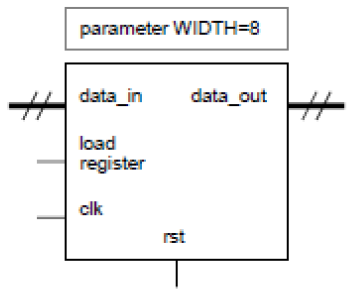

Start with the parameters:

    module register
    #(
        parameter integer WIDTH=8
    )
    (
        input wire clk ,
        input wire rst ,
        input wire load ,
        input wire [WIDTH-1:0] data_in,
        output reg [WIDTH-1:0] data_out
    );
    
We will define the positive edge clock to change the data_out to data_in. We also will reset where the output is 0. Otherwise, the output will stay the same:

    always @(posedge clk)
        if ( rst ) 
            data_out <= 0; 
        else if ( load ) 
            data_out <= data_in;
        else 
            data_out <= data_out;
    endmodule
    
To run the example:

    https://raw.githubusercontent.com/mmorri22/cse30342/main/lec39/register_test.v
    
    irun register.v register_test.v

### Using Continuous & Procedural Assignments

Multiple Continuous assignments to a single net are “wired together”. 

#### Combinational Feedback Loops – Be Careful!

Zero-delay feedback loops may cause the simulator to appear to “lock up”
• The process never finished or suspends
• The simulator never gets to do anything else

Here is a short feedback loop deliberately generating a clock
• A continuous assignment is its own process. Whenever clk_out changes, the value is updated continuously

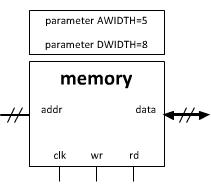

5-bit input gives a 32-bit output
In this case, the 5-bit input still has 32 memory elements, but is for an 8-bit register instead of a 32 bit register.

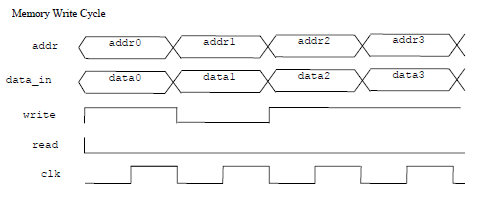

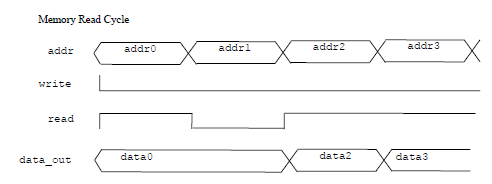

Perform the following commands:

    touch memory.v
    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec39/memory_test.v

## Building the Final Reduced Instruction Set Computer

This is the final RISC computer you will be designing and simulating. This puts all the pieces together.

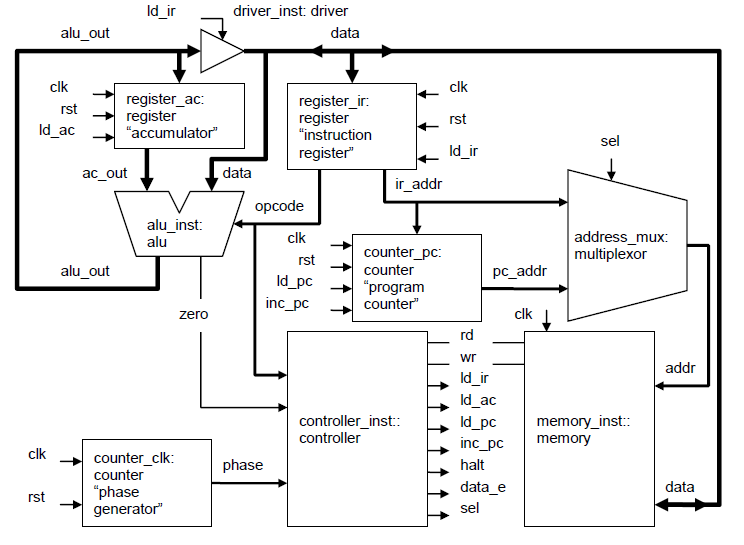


To obtain all the files, run the following command:

    wget https://raw.githubusercontent.com/mmorri22/cse30342/main/lec39/risc_setup.sh
    
You will download all the correct files for the alu, controller, memory, register, and driver code, as well as a file (files.txt) which will allow you to run irun with all the code:

    irun -f files.txt
    
    irun -access +r -gui -f files.txt